<a href="https://colab.research.google.com/github/RajeshworM/Customer-Segmentation-Analysis/blob/main/Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Connect Google drive with Google colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Before diving into the analysis, let's briefly recap the variables provided:**

- TransactionID: Unique identifier for each transaction.
- ProductID: Unique identifier for each product.
- Date: Date of the transaction.
- Price: Price of the product.
- Quantity: Quantity of the product sold.
- CustomerID: Unique identifier for each customer.
- PaymentMethod: Payment method used.
- Region: Geographical region of the transaction.
- Potential Analysis Areas
  https://www.kaggle.com/datasets/arnavsmayan/online-retail-sales-dataset
1. **RFM Analysis:**

- Recency: How recently did a customer make a purchase?
- Frequency: How often does a customer make purchases?
- Monetary: How much money does a customer spend?
- By calculating these metrics, you can segment customers into groups like "high-value," "low-value," "churn risk," etc.

2. **Product Affinity Analysis:**

- Identify products frequently purchased together.
- Use association rule mining techniques (e.g., Apriori, FP-growth) to discover patterns.
- Create product bundles or cross-selling recommendations.

3. **Customer Lifetime Value (CLTV) Analysis:**

- Predict the total revenue a customer will generate over their lifetime.
- Use historical data and statistical models to estimate CLTV.
- Prioritize customers with high CLTV for targeted marketing and retention efforts.

4. **Purchase Behavior Analysis:**

- Analyze purchase patterns (e.g., time of day, day of week, seasonality).
- Identify trends and preferences to optimize marketing strategies.
- Segment customers based on purchase behavior (e.g., impulse buyers, planned buyers).

5. **Geographic Segmentation:**

- Analyze sales data by region to identify regional preferences and trends.
- Tailor marketing campaigns and product offerings to specific regions.

6. **Payment Method Analysis:**

- Analyze the distribution of payment methods used by customers.
- Identify any preferences or trends related to payment methods.
- Optimize payment options based on customer preferences.

7. **Churn Analysis:**

- Predict customers who are likely to stop doing business with the company.
- Use predictive modeling techniques (e.g., logistic regression, survival analysis) to identify at-risk customers.
- Implement retention strategies to prevent customer churn.

- Note: The specific analysis methods and techniques used will depend on the company's goals, resources, and the complexity of the data. It's often a combination of these approaches that provides the most valuable insights.

<font color='blue'> <font size='6'> **RFM Analysis**

In [ ]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# For better visualization
sns.set(style='whitegrid')


In [ ]:
file_path = '/content/drive/My Drive/retail.csv'  # Replace 'MyDrive' with the appropriate folder name
df = pd.read_csv(file_path)

# Display first few rows to get a sense of the data
df.head()



,transaction_id,Date_of_Sale,customer_id,product_id,product_category,quantity,price,discount,payment_method,customer_age,customer_gender,customer_location,total_amount
0,1,01-01-2023 00:00,1993,915,Home & Kitchen,8,103.30,0.23,Gift Card,27,Female,North America,636.33
1,2,01-01-2023 00:01,3474,553,Clothing,9,180.28,0.31,Gift Card,53,Other,South America,1119.54
2,3,01-01-2023 00:02,4564,248,Beauty & Personal Care,7,81.58,0.27,Debit Card,34,Other,North America,416.87
3,4,01-01-2023 00:03,1133,948,Clothing,3,235.20,0.00,Debit Card,50,Other,Australia,705.60
4,5,01-01-2023 00:04,3626,284,Books,9,453.00,0.34,Credit Card,23,Female,Australia,2690.82


In [ ]:
# Rename the column
df = df.rename(columns={'Date_of_Sale': 'Date'})
df.head()

,transaction_id,Date,customer_id,product_id,product_category,quantity,price,discount,payment_method,customer_age,customer_gender,customer_location,total_amount
0,1,01-01-2023 00:00,1993,915,Home & Kitchen,8,103.30,0.23,Gift Card,27,Female,North America,636.33
1,2,01-01-2023 00:01,3474,553,Clothing,9,180.28,0.31,Gift Card,53,Other,South America,1119.54
2,3,01-01-2023 00:02,4564,248,Beauty & Personal Care,7,81.58,0.27,Debit Card,34,Other,North America,416.87
3,4,01-01-2023 00:03,1133,948,Clothing,3,235.20,0.00,Debit Card,50,Other,Australia,705.60
4,5,01-01-2023 00:04,3626,284,Books,9,453.00,0.34,Credit Card,23,Female,Australia,2690.82


In [ ]:
# Check for missing values
missing_values = df.isnull().sum()

# Fill or drop missing values
df = df.dropna()  # Dropping rows with missing data, alternatively, you can fill missing values


In [ ]:
# Ensure the 'Date' column is in datetime format
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Drop rows where 'Date' could not be converted
df = df.dropna(subset=['Date'])
df.head()


,transaction_id,Date,customer_id,product_id,product_category,quantity,price,discount,payment_method,customer_age,customer_gender,customer_location,total_amount
0,1,2023-01-01 00:00:00,1993,915,Home & Kitchen,8,103.30,0.23,Gift Card,27,Female,North America,636.33
1,2,2023-01-01 00:01:00,3474,553,Clothing,9,180.28,0.31,Gift Card,53,Other,South America,1119.54
2,3,2023-01-01 00:02:00,4564,248,Beauty & Personal Care,7,81.58,0.27,Debit Card,34,Other,North America,416.87
3,4,2023-01-01 00:03:00,1133,948,Clothing,3,235.20,0.00,Debit Card,50,Other,Australia,705.60
4,5,2023-01-01 00:04:00,3626,284,Books,9,453.00,0.34,Credit Card,23,Female,Australia,2690.82


In [ ]:
# Create the 'totalprice' column by multiplying Price by Quantity
df['totalprice'] = df['price'] * df['quantity']


**Feature Engineering for RFM**

Calculate Recency, Frequency, and Monetary for each customer:

In [ ]:
# Set today as the max date for recency calculation
current_date = df['Date'].max() + pd.Timedelta(days=1)

# RFM Table
rfm_table = df.groupby('customer_id').agg({
    'Date': lambda x: (current_date - x.max()).days,  # Recency
    'transaction_id': 'count',  # Frequency
    'totalprice': 'sum'  # Monetary
}).reset_index()

# Rename columns
rfm_table.columns = ['Customerid', 'Recency', 'Frequency', 'Monetary']

# Display the RFM table
rfm_table.head()



,Customerid,Recency,Frequency,Monetary
0,1000,2,85,110457.35
1,1001,5,99,110898.49
2,1002,3,122,180864.78
3,1003,1,100,138137.92
4,1004,1,110,126236.85


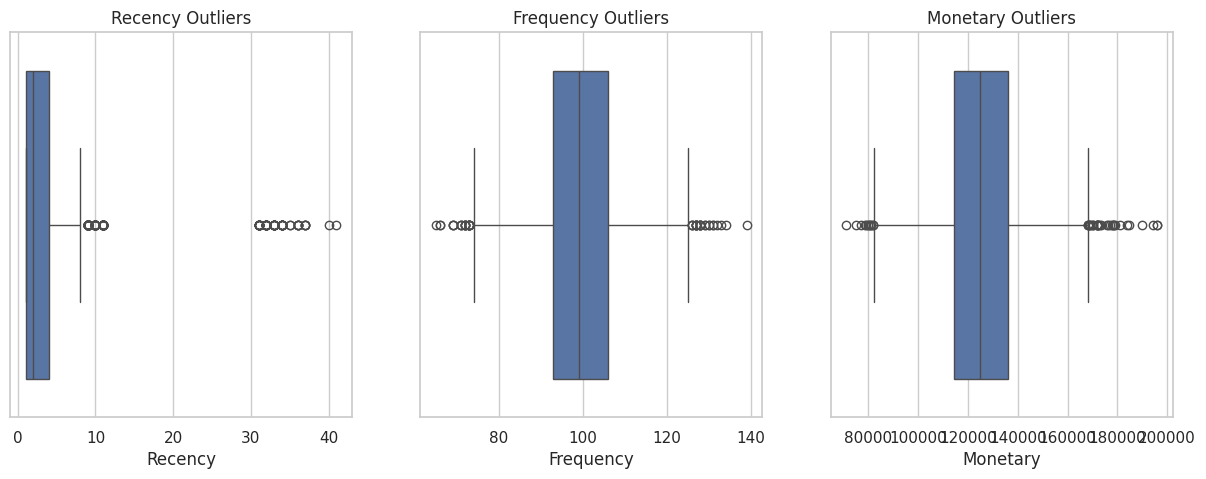

In [ ]:
# Plot boxplots for Recency, Frequency, and Monetary to identify outliers
plt.figure(figsize=(15,5))

# Recency boxplot
plt.subplot(1, 3, 1)
sns.boxplot(x=rfm_table['Recency'])
plt.title('Recency Outliers')

# Frequency boxplot
plt.subplot(1, 3, 2)
sns.boxplot(x=rfm_table['Frequency'])
plt.title('Frequency Outliers')

# Monetary boxplot
plt.subplot(1, 3, 3)
sns.boxplot(x=rfm_table['Monetary'])
plt.title('Monetary Outliers')

plt.show()


In [ ]:
# Quantile-based scoring for Recency, Frequency, and Monetary
rfm_table['R_Score'] = pd.qcut(rfm_table['Recency'], 4, labels=[4, 3, 2], duplicates='drop')
rfm_table['F_Score'] = pd.qcut(rfm_table['Frequency'].rank(method='dense'), 4, labels=[1, 2, 3, 4])
rfm_table['M_Score'] = pd.qcut(rfm_table['Monetary'], 4, labels=[1, 2, 3, 4])

# ... rest of your code

# Sum the RFM scores
rfm_table['RFM_Score'] = rfm_table['R_Score'].astype(str) + rfm_table['F_Score'].astype(str) + rfm_table['M_Score'].astype(str)

# Display the final RFM table
rfm_table.head()


,Customerid,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score
0,1000,2,85,110457.35,4,1,1,411
1,1001,5,99,110898.49,2,2,1,221
2,1002,3,122,180864.78,3,4,4,344
3,1003,1,100,138137.92,4,3,4,434
4,1004,1,110,126236.85,4,4,3,443


In [ ]:
# Define RFM segments based on scores
def rfm_segment(x):
    if x == '444':
        return 'Top Customers'
    elif x[0] == '4':
        return 'Loyal Customers'
    elif x[1] == '4':
        return 'Frequent Customers'
    elif x[2] == '4':
        return 'Big Spenders'
    else:
        return 'Others'

rfm_table['RFM_Segment'] = rfm_table['RFM_Score'].apply(rfm_segment)

# Count the number of customers in each segment
rfm_table['RFM_Segment'].value_counts()


,count
RFM_Segment,
Loyal Customers,1728
Others,1363
Frequent Customers,407
Top Customers,335
Big Spenders,167


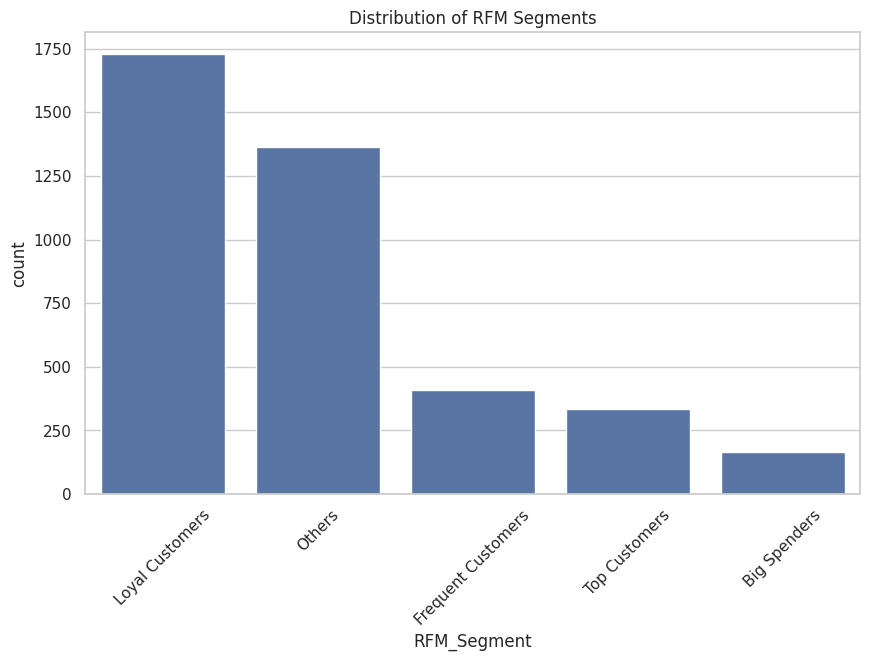

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='RFM_Segment', data=rfm_table, order=rfm_table['RFM_Segment'].value_counts().index)
plt.title('Distribution of RFM Segments')
plt.xticks(rotation=45)
plt.show()


In [ ]:
print(rfm_table.head())
# Save RFM table to CSV
rfm_table.to_csv('rfm_analysis_results.csv', index=False)
print("CSV export successful!")


   Customerid  Recency  Frequency   Monetary R_Score F_Score M_Score  \
0        1000        2         85  110457.35       4       1       1   
1        1001        5         99  110898.49       2       2       1   
2        1002        3        122  180864.78       3       4       4   
3        1003        1        100  138137.92       4       3       4   
4        1004        1        110  126236.85       4       4       3   

  RFM_Score         RFM_Segment  
0       411     Loyal Customers  
1       221              Others  
2       344  Frequent Customers  
3       434     Loyal Customers  
4       443     Loyal Customers  
CSV export successful!




<font color='blue'> <font size='6'>  2. **Product Affinity Analysis:**


In [ ]:
!pip install pandas mlxtend


In [ ]:
df.head()

,transaction_id,Date,customer_id,product_id,product_category,quantity,price,discount,payment_method,customer_age,customer_gender,customer_location,total_amount,totalprice
0,1,2023-01-01 00:00:00,1993,915,Home & Kitchen,8,103.30,0.23,Gift Card,27,Female,North America,636.33,826.40
1,2,2023-01-01 00:01:00,3474,553,Clothing,9,180.28,0.31,Gift Card,53,Other,South America,1119.54,1622.52
2,3,2023-01-01 00:02:00,4564,248,Beauty & Personal Care,7,81.58,0.27,Debit Card,34,Other,North America,416.87,571.06
3,4,2023-01-01 00:03:00,1133,948,Clothing,3,235.20,0.00,Debit Card,50,Other,Australia,705.60,705.60
4,5,2023-01-01 00:04:00,3626,284,Books,9,453.00,0.34,Credit Card,23,Female,Australia,2690.82,4077.00


In [ ]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

In [ ]:
print(df[['transaction_id', 'product_id', 'quantity']].head())


   transaction_id  product_id  quantity
0               1         915         8
1               2         553         9
2               3         248         7
3               4         948         3
4               5         284         9


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
print(df.columns)  # Check all column names

# Check if 'quantity' is numeric
print(df['quantity'].dtype)


Index(['transaction_id', 'Date', 'customer_id', 'product_id',
       'product_category', 'quantity', 'price', 'discount', 'payment_method',
       'customer_age', 'customer_gender', 'customer_location', 'total_amount',
       'totalprice'],
      dtype='object')
int64


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Convert 'quantity' to numeric if needed
df['quantity'] = pd.to_numeric(df['quantity'], errors='coerce')


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Drop rows where 'transaction_id', 'product_id', or 'quantity' are missing
df = df.dropna(subset=['transaction_id', 'product_id', 'quantity'])


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Apply Apriori with a lower min_support
frequent_itemsets = apriori(basket, min_support=0.005, use_colnames=True)

# Check if frequent itemsets are generated
if frequent_itemsets.empty:
    print("No frequent itemsets found. Try lowering the min_support further.")
else:
    # Generate the association rules
    rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

    # Sort by lift to get the strongest associations
    rules = rules.sort_values(by='lift', ascending=False)

    # Display the top 10 rules
    print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(10))


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


No frequent itemsets found. Try lowering the min_support further.


In [ ]:
# Check the number of unique products and transactions
print(f"Number of unique products: {df['product_id'].nunique()}")
print(f"Number of unique transactions: {df['transaction_id'].nunique()}")


Number of unique products: 900
Number of unique transactions: 397440


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Group by 'transaction_id' and 'product_category' if relevant
basket_category = df.groupby(['transaction_id', 'product_category'])['quantity'].sum().unstack().fillna(0)

# Convert quantities to boolean (True if bought, False if not)
basket_category = basket_category.applymap(lambda x: 1 if x > 0 else 0).astype('bool')

# Apply Apriori on product categories
frequent_itemsets_category = apriori(basket_category, min_support=0.005, use_colnames=True)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-50-dabae73dda7a>:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket_category = basket_category.applymap(lambda x: 1 if x > 0 else 0).astype('bool')


In [ ]:
print(df[['transaction_id', 'product_id', 'quantity']].sample(10))


        transaction_id  product_id  quantity
969716          969717         923         6
189060          189061         819         7
99848            99849         281         6
446160          446161         880         6
838850          838851         123         7
403107          403108         918         3
96682            96683         936         5
52885            52886         568         8
843165          843166         239         4
702851          702852         308         3


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



<font color='blue'> <font size='6'>  3. **Customer Lifetime Value Analysis:**

In [ ]:
import pandas as pd
import datetime as dt

# Load your dataset
df.head()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,transaction_id,Date,customer_id,product_id,product_category,quantity,price,discount,payment_method,customer_age,customer_gender,customer_location,total_amount,totalprice
0,1,2023-01-01 00:00:00,1993,915,Home & Kitchen,8,103.30,0.23,Gift Card,27,Female,North America,636.33,826.40
1,2,2023-01-01 00:01:00,3474,553,Clothing,9,180.28,0.31,Gift Card,53,Other,South America,1119.54,1622.52
2,3,2023-01-01 00:02:00,4564,248,Beauty & Personal Care,7,81.58,0.27,Debit Card,34,Other,North America,416.87,571.06
3,4,2023-01-01 00:03:00,1133,948,Clothing,3,235.20,0.00,Debit Card,50,Other,Australia,705.60,705.60
4,5,2023-01-01 00:04:00,3626,284,Books,9,453.00,0.34,Credit Card,23,Female,Australia,2690.82,4077.00


In [ ]:

# Convert 'Date' to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Set a 'snapshot' date to calculate recency (e.g., the day after the last transaction)
snapshot_date = df['Date'].max() + dt.timedelta(days=1)

# Calculate RFM metrics for each customer
rfm = df.groupby('customer_id').agg({
    'Date': lambda x: (snapshot_date - x.max()).days,  # Recency: Days since last purchase
    'transaction_id': 'count',  # Frequency: Number of transactions
    'totalprice': 'sum'  # Monetary: Total spending
}).reset_index()

# Rename the columns
rfm.columns = ['customer_id', 'recency', 'frequency', 'monetary']

# Filter out customers with zero monetary value
rfm = rfm[rfm['monetary'] > 0]

# Check the RFM metrics
print(rfm.head())

# CLV calculation using simple average monetary value
# CLV = Average Revenue per Customer * Purchase Frequency * Customer Lifetime (Assumed)
# For simplicity, assume average customer lifetime is 2 years (24 months)

# First, calculate the average order value (monetary / frequency)
rfm['avg_order_value'] = rfm['monetary'] / rfm['frequency']

# Then, calculate the purchase frequency (number of orders / number of unique customers)
purchase_frequency = rfm['frequency'].sum() / rfm.shape[0]

# Calculate the retention rate (assume for simplicity that it’s 0.5 or calculate based on data)
retention_rate = 0.5  # Assumed retention rate

# Calculate CLV
# CLV = (Average Order Value * Purchase Frequency) / Churn Rate (1 - retention rate)
rfm['clv'] = (rfm['avg_order_value'] * purchase_frequency) / (1 - retention_rate)

# Show top customers by CLV
print(rfm[['customer_id', 'recency', 'frequency', 'monetary', 'clv']].sort_values(by='clv', ascending=False).head(10))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


   customer_id  recency  frequency   monetary
0         1000        2         85  110457.35
1         1001        5         99  110898.49
2         1002        3        122  180864.78
3         1003        1        100  138137.92
4         1004        1        110  126236.85
      customer_id  recency  frequency   monetary            clv
1452         2452        3         73  119137.44  324314.959956
1661         2661        7        107  173225.03  321712.878146
3579         4579        6         80  129077.46  320628.410640
2603         3603        3        104  167258.32  319592.051446
1901         2901        3        108  171697.88  315924.099200
2926         3926        1         83  131568.56  315003.665581
2254         3254        1        113  178597.69  314079.052715
3375         4375       11        117  184681.18  313673.881108
1681         2681        4        114  179173.41  312327.544168
3034         4034        4         73  114641.74  312076.802367


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


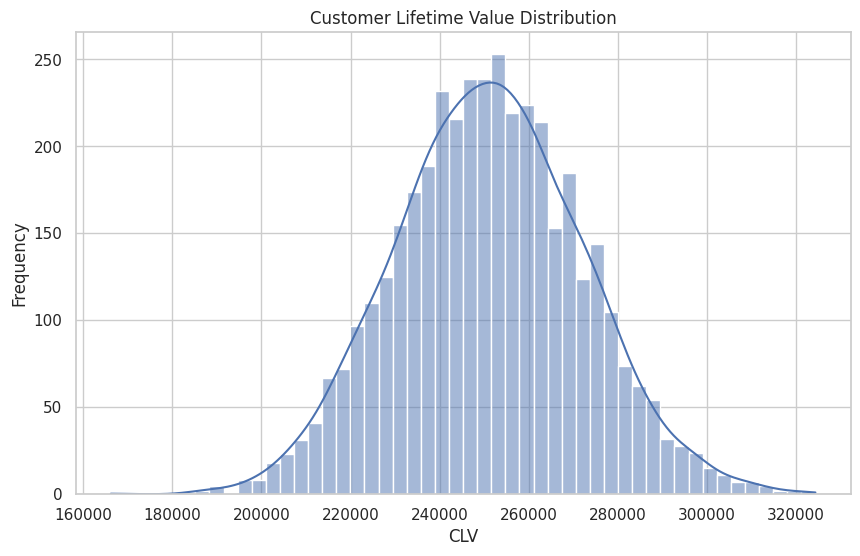

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot CLV distribution
plt.figure(figsize=(10,6))
sns.histplot(rfm['clv'], bins=50, kde=True)
plt.title('Customer Lifetime Value Distribution')
plt.xlabel('CLV')
plt.ylabel('Frequency')
plt.show()


<font color='blue'> <font size='6'>  4. **Purchase Behavior Analysis:**

1. Data Preparation

In [ ]:
import pandas as pd

# Load the dataset
df.head()

# Convert 'Date' to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Check for missing values
print(df.isnull().sum())

# Fill missing values (if any) or drop rows with missing critical data
df = df.dropna(subset=['customer_id', 'product_id', 'totalprice'])


transaction_id       0
Date                 0
customer_id          0
product_id           0
product_category     0
quantity             0
price                0
discount             0
payment_method       0
customer_age         0
customer_gender      0
customer_location    0
total_amount         0
totalprice           0
dtype: int64


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


2. Customer Segmentation by Demographics
-     a) Customer Age Segmentation

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-58-d36ff636f01f>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_spending = df.groupby('age_group')['totalprice'].sum().reset_index()


  age_group   totalprice
0     18-25  67197439.14
1     26-35  97314318.32
2     36-45  96776719.58
3     46-55  96755464.88
4     56-65  95842242.60
5       65+  38376377.63


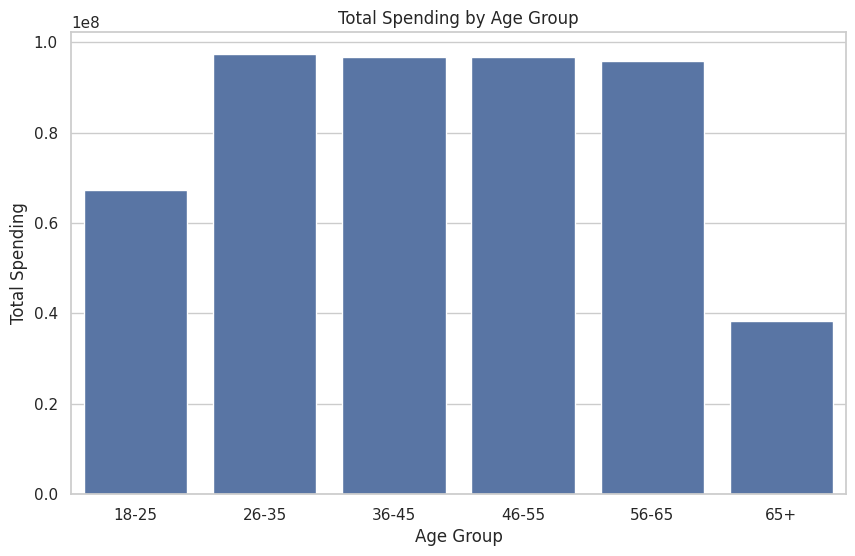

In [ ]:
# Create age groups
bins = [18, 25, 35, 45, 55, 65, 100]  # Define age bins
labels = ['18-25', '26-35', '36-45', '46-55', '56-65', '65+']  # Define age labels
df['age_group'] = pd.cut(df['customer_age'], bins=bins, labels=labels)

# Analyze total spending by age group
age_group_spending = df.groupby('age_group')['totalprice'].sum().reset_index()

print(age_group_spending)

# Visualize the spending by age group
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.barplot(x='age_group', y='totalprice', data=age_group_spending)
plt.title('Total Spending by Age Group')
plt.ylabel('Total Spending')
plt.xlabel('Age Group')
plt.show()


-  b) Customer Gender Analysis

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


  customer_gender    totalprice
0          Female  1.672858e+08
1            Male  1.679520e+08
2           Other  1.667328e+08


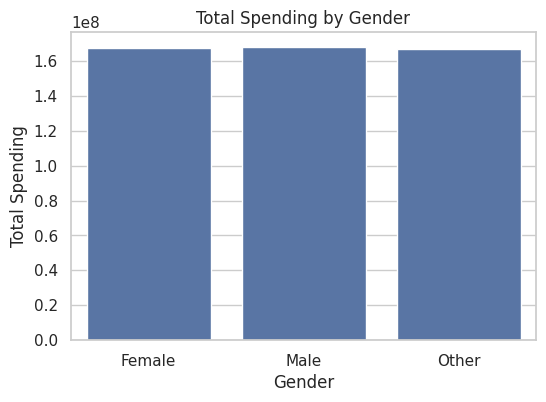

In [ ]:
# Analyze total spending by gender
gender_spending = df.groupby('customer_gender')['totalprice'].sum().reset_index()

print(gender_spending)

# Visualize the spending by gender
plt.figure(figsize=(6,4))
sns.barplot(x='customer_gender', y='totalprice', data=gender_spending)
plt.title('Total Spending by Gender')
plt.ylabel('Total Spending')
plt.xlabel('Gender')
plt.show()


-   c) Customer Location Analysis


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


  customer_location   totalprice
2         Australia  84235354.18
3            Europe  83776088.82
5     South America  83759312.27
1              Asia  83507850.37
0            Africa  83370912.37
4     North America  83321074.46


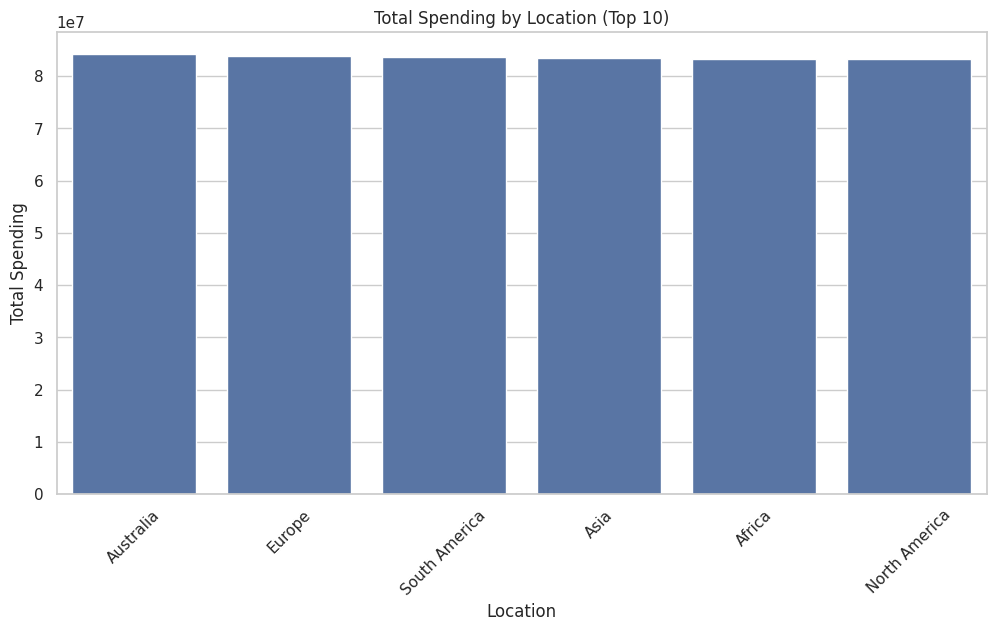

In [ ]:
# Analyze total spending by location
location_spending = df.groupby('customer_location')['totalprice'].sum().reset_index()

# Sort by total spending
location_spending = location_spending.sort_values(by='totalprice', ascending=False).head(10)

print(location_spending)

# Visualize spending by location
plt.figure(figsize=(12,6))
sns.barplot(x='customer_location', y='totalprice', data=location_spending)
plt.title('Total Spending by Location (Top 10)')
plt.xticks(rotation=45)
plt.ylabel('Total Spending')
plt.xlabel('Location')
plt.show()


3. Product Preference Analysis
-    a) Most Purchased Products

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


     product_id  quantity
812         912      2612
543         643      2559
13          113      2550
879         979      2515
263         363      2496
671         771      2482
212         312      2470
596         696      2467
372         472      2464
563         663      2462


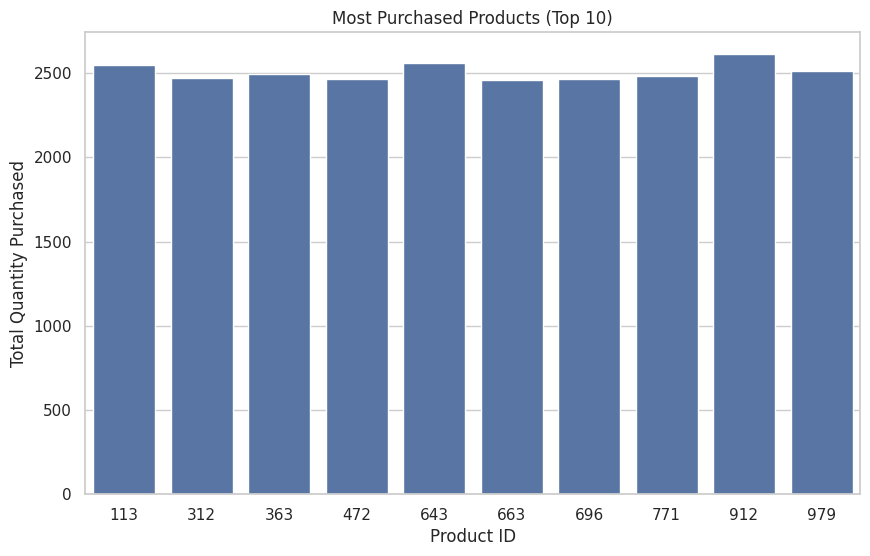

In [ ]:
# Analyze the most purchased products by quantity
product_quantity = df.groupby('product_id')['quantity'].sum().reset_index().sort_values(by='quantity', ascending=False).head(10)

print(product_quantity)

# Visualize most purchased products
plt.figure(figsize=(10,6))
sns.barplot(x='product_id', y='quantity', data=product_quantity)
plt.title('Most Purchased Products (Top 10)')
plt.ylabel('Total Quantity Purchased')
plt.xlabel('Product ID')
plt.show()


-  b) Most Popular Product Categories

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


         product_category   totalprice
0  Beauty & Personal Care  83904092.83
3             Electronics  83862253.44
5       Sports & Outdoors  83788413.82
2                Clothing  83692734.57
4          Home & Kitchen  83396004.32
1                   Books  83327093.49


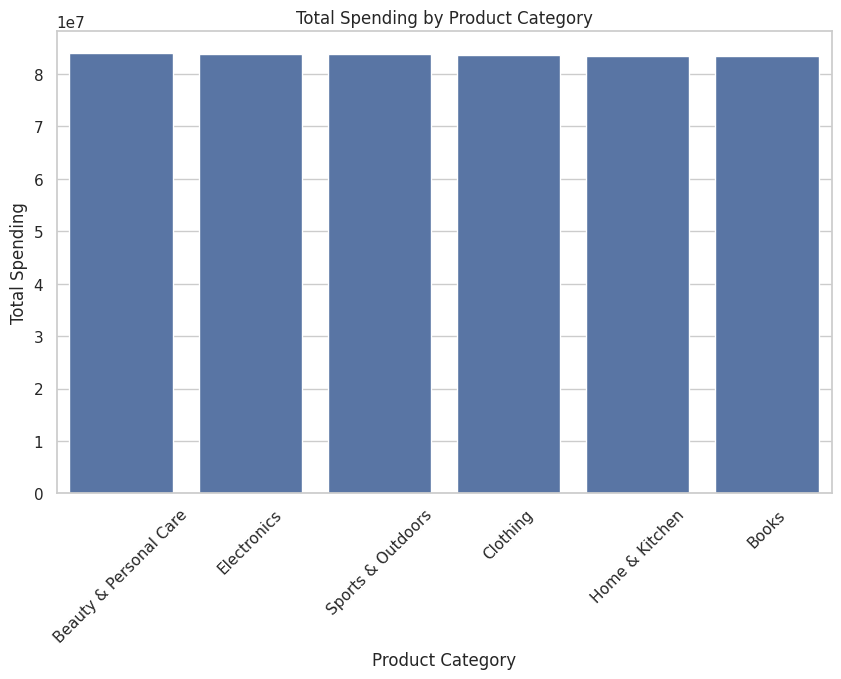

In [ ]:
# Analyze total spending by product category
category_spending = df.groupby('product_category')['totalprice'].sum().reset_index().sort_values(by='totalprice', ascending=False)

print(category_spending)

# Visualize spending by product category
plt.figure(figsize=(10,6))
sns.barplot(x='product_category', y='totalprice', data=category_spending)
plt.title('Total Spending by Product Category')
plt.ylabel('Total Spending')
plt.xlabel('Product Category')
plt.xticks(rotation=45)
plt.show()


4. Spending Patterns and Discounts
-   a) Average Transaction Value

In [ ]:
# Calculate average transaction value
avg_transaction_value = df.groupby('transaction_id')['totalprice'].sum().mean()

print(f"Average Transaction Value: {avg_transaction_value}")


Average Transaction Value: 1263.0097435336152


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


- b) Discount Usage

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Average Discount Applied: 0.2500877616747182
   discount    totalprice
0     False  4.880871e+06
1      True  4.970897e+08


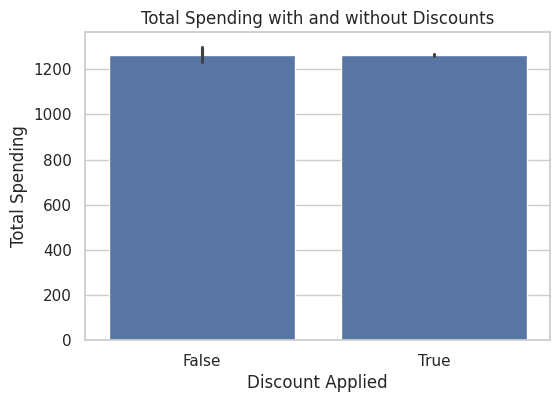

In [ ]:
# Calculate the average discount applied per transaction
avg_discount = df['discount'].mean()

print(f"Average Discount Applied: {avg_discount}")

# Analyze total spending with and without discounts
discount_spending = df.groupby(df['discount'] > 0)['totalprice'].sum().reset_index()

print(discount_spending)

# Visualize spending with and without discounts
plt.figure(figsize=(6,4))
sns.barplot(x=(df['discount'] > 0), y='totalprice', data=df)
plt.title('Total Spending with and without Discounts')
plt.ylabel('Total Spending')
plt.xlabel('Discount Applied')
plt.show()


5. Purchase Frequency and Recency
-   a) Purchase Frequency

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


      customer_id  transaction_id
3314         4314             139
3764         4764             134
1051         2051             133
53           1053             132
463          1463             131
1466         2466             131
2901         3901             130
1024         2024             130
2090         3090             129
1712         2712             129


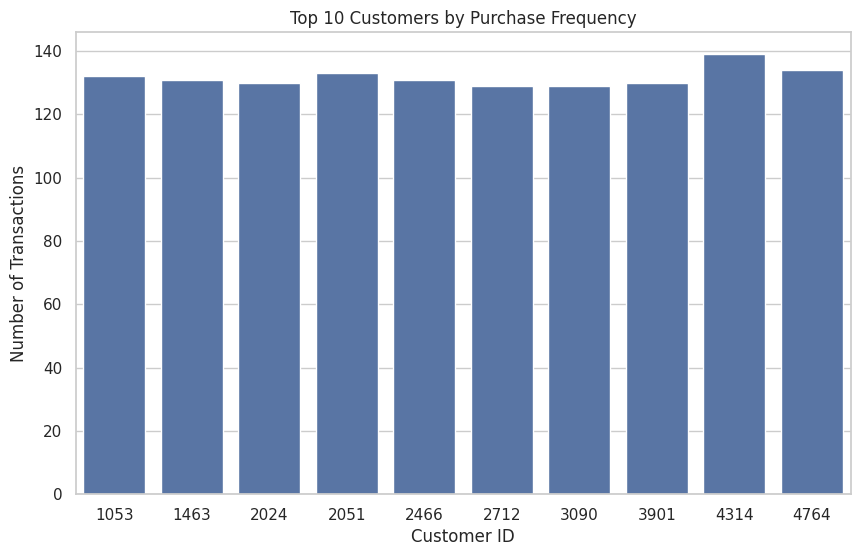

In [ ]:
# Calculate purchase frequency per customer
purchase_frequency = df.groupby('customer_id')['transaction_id'].nunique().reset_index().sort_values(by='transaction_id', ascending=False).head(10)

print(purchase_frequency)

# Visualize the top 10 frequent customers
plt.figure(figsize=(10,6))
sns.barplot(x='customer_id', y='transaction_id', data=purchase_frequency)
plt.title('Top 10 Customers by Purchase Frequency')
plt.ylabel('Number of Transactions')
plt.xlabel('Customer ID')
plt.show()


-   b) Recency of Purchases

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


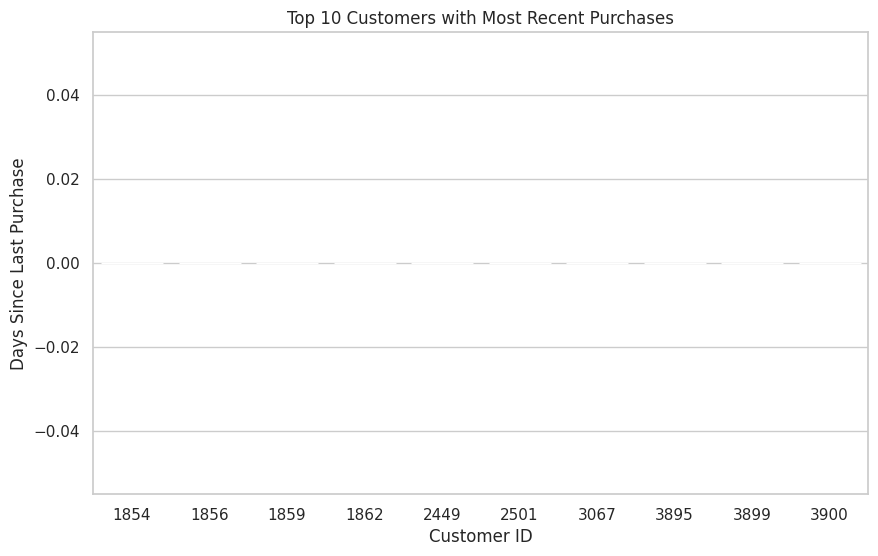

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load and check if 'Date' is in proper datetime format
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Remove rows with missing dates
df = df.dropna(subset=['Date'])

# Get the most recent purchase date for each customer
most_recent_purchase = df.groupby('customer_id')['Date'].max().reset_index()

# Calculate recency: Difference between the last purchase and the maximum date in the dataset
current_date = df['Date'].max()
most_recent_purchase['days_since_last_purchase'] = (current_date - most_recent_purchase['Date']).dt.days

# Sort by recency (most recent purchases first)
recent_purchases = most_recent_purchase.sort_values(by='days_since_last_purchase').head(10)

# Plot the top 10 customers with the most recent purchases
plt.figure(figsize=(10,6))
sns.barplot(x='customer_id', y='days_since_last_purchase', data=recent_purchases)
plt.title('Top 10 Customers with Most Recent Purchases')
plt.ylabel('Days Since Last Purchase')
plt.xlabel('Customer ID')
plt.show()


6. Payment Method Analysis

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


  payment_method    totalprice
2      Gift Card  1.262041e+08
0    Credit Card  1.252585e+08
1     Debit Card  1.252558e+08
3         PayPal  1.252523e+08


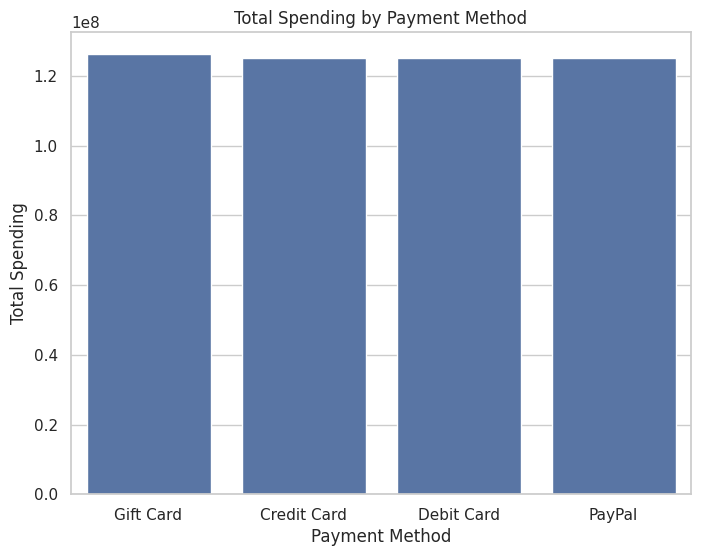

In [ ]:
# Analyze total spending by payment method
payment_method_spending = df.groupby('payment_method')['totalprice'].sum().reset_index().sort_values(by='totalprice', ascending=False)

print(payment_method_spending)

# Visualize spending by payment method
plt.figure(figsize=(8,6))
sns.barplot(x='payment_method', y='totalprice', data=payment_method_spending)
plt.title('Total Spending by Payment Method')
plt.ylabel('Total Spending')
plt.xlabel('Payment Method')
plt.show()


<font color='blue'> <font size='6'> **5. Geographic Segmentaion**

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


   transaction_id                Date  customer_id  product_id  \
0               1 2023-01-01 00:00:00         1993         915   
1               2 2023-01-01 00:01:00         3474         553   
2               3 2023-01-01 00:02:00         4564         248   
3               4 2023-01-01 00:03:00         1133         948   
4               5 2023-01-01 00:04:00         3626         284   

         product_category  quantity   price  discount payment_method  \
0          Home & Kitchen         8  103.30      0.23      Gift Card   
1                Clothing         9  180.28      0.31      Gift Card   
2  Beauty & Personal Care         7   81.58      0.27     Debit Card   
3                Clothing         3  235.20      0.00     Debit Card   
4                   Books         9  453.00      0.34    Credit Card   

   customer_age customer_gender customer_location  total_amount  totalprice  \
0            27          Female     North America        636.33      826.40   
1           

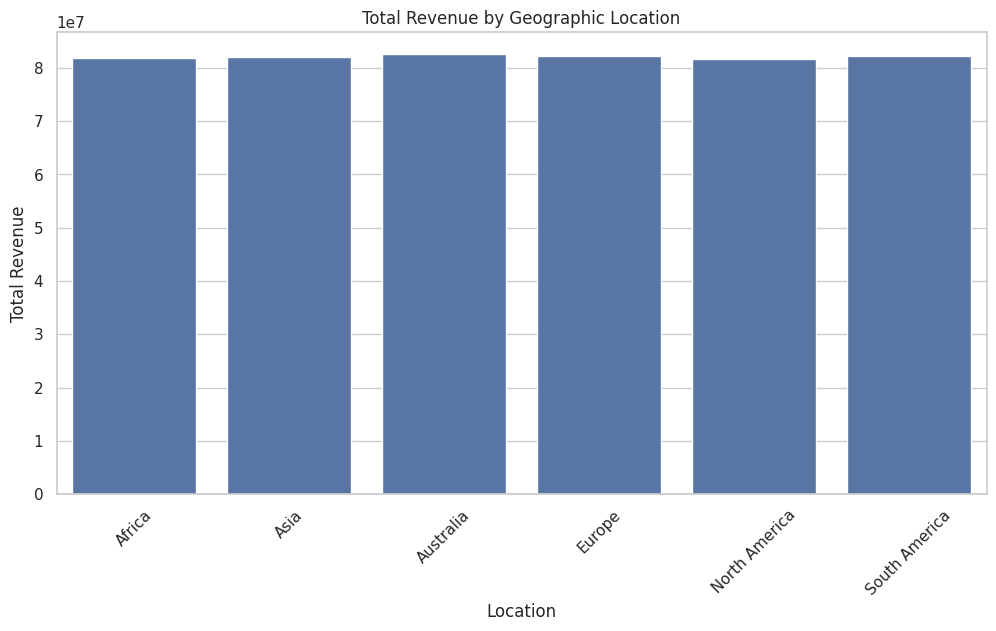

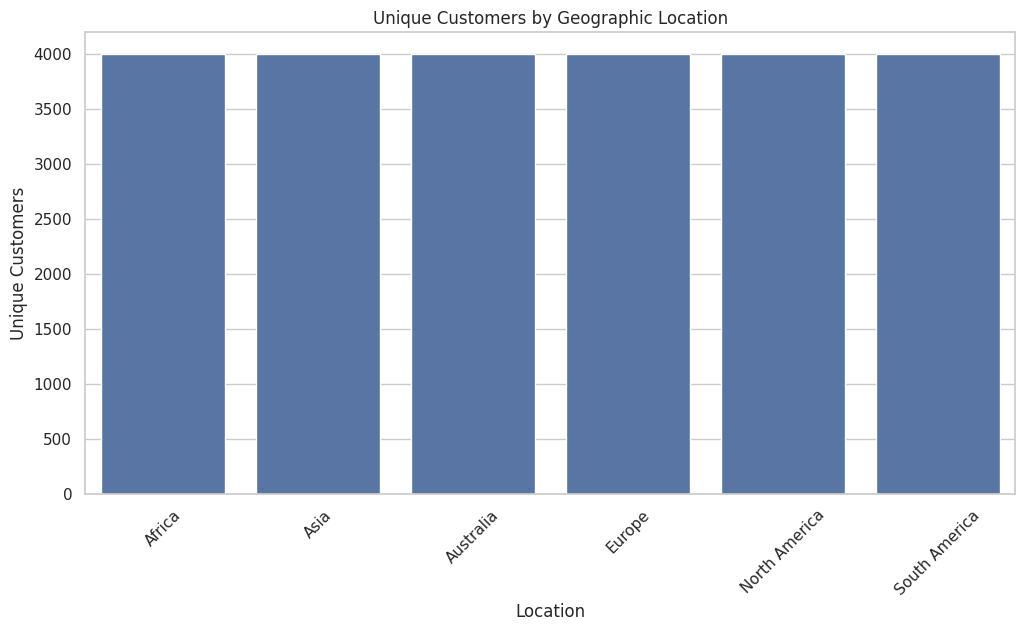

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Preview the data
print(df.head())

# Data Preprocessing
# Check for missing values
print(df.isnull().sum())

# Drop rows with missing values or fill them as needed
df.dropna(inplace=True)

# Group by geographic segment
geographic_segmentation = df.groupby('customer_location').agg({
    'totalprice': 'sum',
    'quantity': 'sum',
    'customer_id': 'nunique'
}).reset_index()

# Rename columns for clarity
geographic_segmentation.columns = ['Location', 'Total Revenue', 'Total Quantity Sold', 'Unique Customers']

# Analyze the segmentation
print(geographic_segmentation)

# Visualize the segmentation
plt.figure(figsize=(12, 6))
sns.barplot(x='Location', y='Total Revenue', data=geographic_segmentation)
plt.xticks(rotation=45)
plt.title('Total Revenue by Geographic Location')
plt.ylabel('Total Revenue')
plt.xlabel('Location')
plt.show()

# You can also visualize unique customers
plt.figure(figsize=(12, 6))
sns.barplot(x='Location', y='Unique Customers', data=geographic_segmentation)
plt.xticks(rotation=45)
plt.title('Unique Customers by Geographic Location')
plt.ylabel('Unique Customers')
plt.xlabel('Location')
plt.show()


<font color='blue'> <font size='6'> **6. Payment Method Analysis**

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


   transaction_id                Date  customer_id  product_id  \
0               1 2023-01-01 00:00:00         1993         915   
1               2 2023-01-01 00:01:00         3474         553   
2               3 2023-01-01 00:02:00         4564         248   
3               4 2023-01-01 00:03:00         1133         948   
4               5 2023-01-01 00:04:00         3626         284   

         product_category  quantity   price  discount payment_method  \
0          Home & Kitchen         8  103.30      0.23      Gift Card   
1                Clothing         9  180.28      0.31      Gift Card   
2  Beauty & Personal Care         7   81.58      0.27     Debit Card   
3                Clothing         3  235.20      0.00     Debit Card   
4                   Books         9  453.00      0.34    Credit Card   

   customer_age customer_gender customer_location  total_amount  totalprice  \
0            27          Female     North America        636.33      826.40   
1           

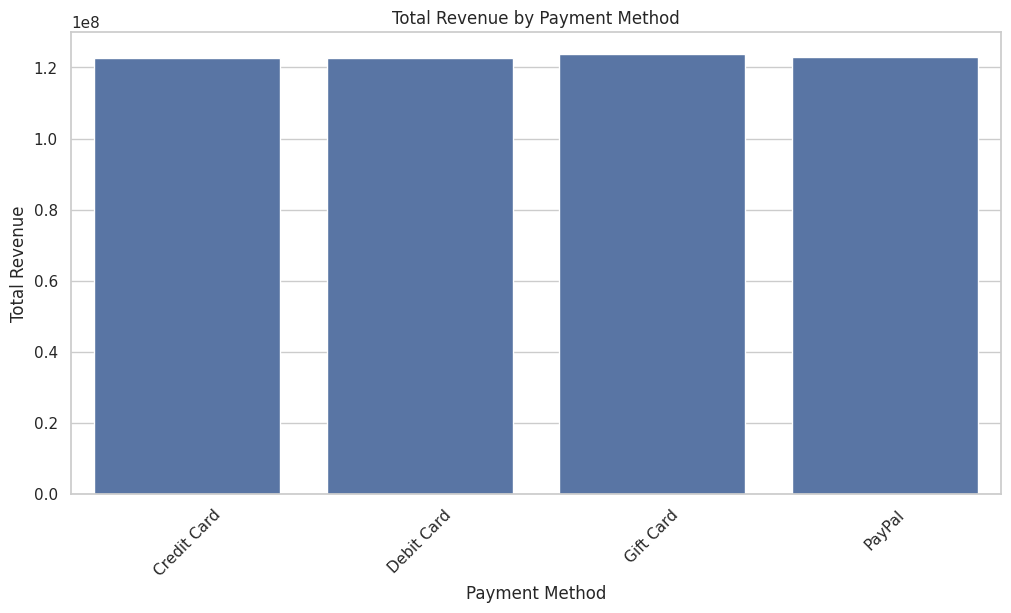

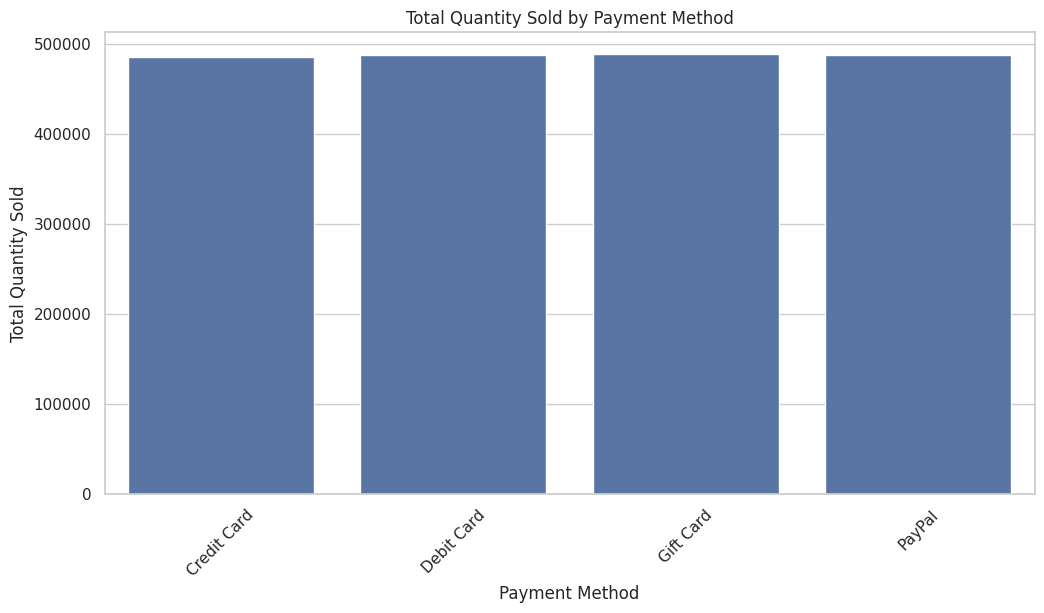

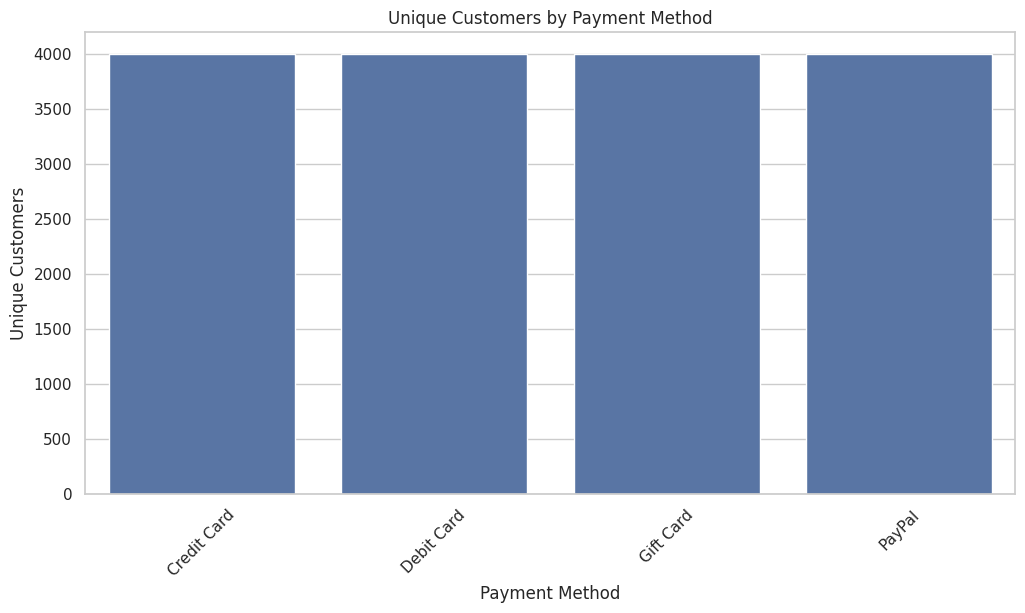

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Preview the data
print(df.head())

# Data Preprocessing
# Check for missing values
print(df.isnull().sum())

# Drop rows with missing values or fill them as needed
df.dropna(inplace=True)

# Group by payment method
payment_method_analysis = df.groupby('payment_method').agg({
    'totalprice': 'sum',
    'quantity': 'sum',
    'customer_id': 'nunique'
}).reset_index()

# Rename columns for clarity
payment_method_analysis.columns = ['Payment Method', 'Total Revenue', 'Total Quantity Sold', 'Unique Customers']

# Analyze the payment methods
print(payment_method_analysis)

# Visualize the Total Revenue by Payment Method
plt.figure(figsize=(12, 6))
sns.barplot(x='Payment Method', y='Total Revenue', data=payment_method_analysis)
plt.xticks(rotation=45)
plt.title('Total Revenue by Payment Method')
plt.ylabel('Total Revenue')
plt.xlabel('Payment Method')
plt.show()

# Visualize the Total Quantity Sold by Payment Method
plt.figure(figsize=(12, 6))
sns.barplot(x='Payment Method', y='Total Quantity Sold', data=payment_method_analysis)
plt.xticks(rotation=45)
plt.title('Total Quantity Sold by Payment Method')
plt.ylabel('Total Quantity Sold')
plt.xlabel('Payment Method')
plt.show()

# Visualize Unique Customers by Payment Method
plt.figure(figsize=(12, 6))
sns.barplot(x='Payment Method', y='Unique Customers', data=payment_method_analysis)
plt.xticks(rotation=45)
plt.title('Unique Customers by Payment Method')
plt.ylabel('Unique Customers')
plt.xlabel('Payment Method')
plt.show()


<font color='blue'> <font size='6'> **7. Churn Analysis**

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


   transaction_id                Date  customer_id  product_id  \
0               1 2023-01-01 00:00:00         1993         915   
1               2 2023-01-01 00:01:00         3474         553   
2               3 2023-01-01 00:02:00         4564         248   
3               4 2023-01-01 00:03:00         1133         948   
4               5 2023-01-01 00:04:00         3626         284   

         product_category  quantity   price  discount payment_method  \
0          Home & Kitchen         8  103.30      0.23      Gift Card   
1                Clothing         9  180.28      0.31      Gift Card   
2  Beauty & Personal Care         7   81.58      0.27     Debit Card   
3                Clothing         3  235.20      0.00     Debit Card   
4                   Books         9  453.00      0.34    Credit Card   

   customer_age customer_gender customer_location  total_amount  totalprice  \
0            27          Female     North America        636.33      826.40   
1           

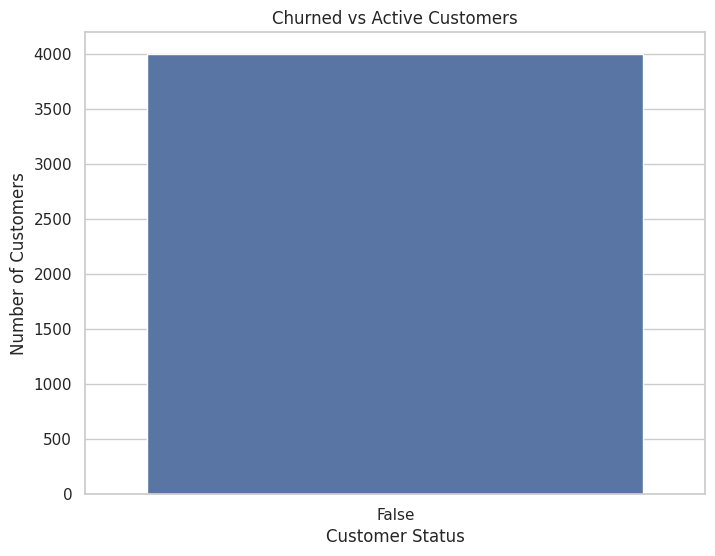

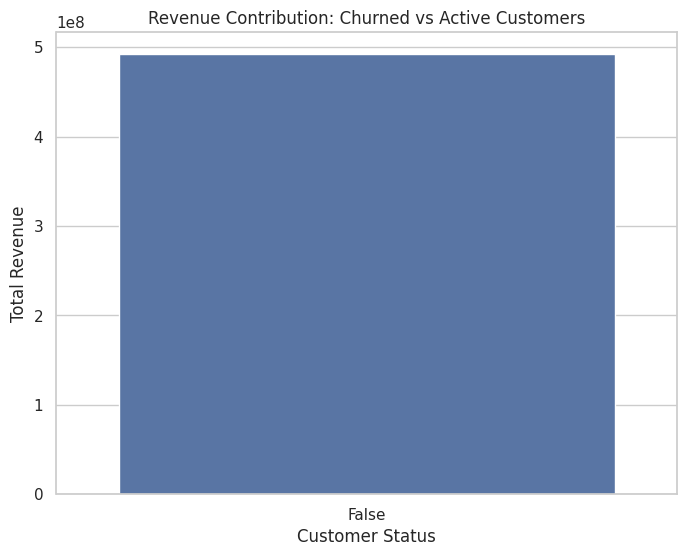

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Preview the data
print(df.head())

# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Define the churn threshold in days (e.g., 180 days = 6 months)
churn_threshold = 180

# Calculate the last transaction date for each customer
last_purchase = df.groupby('customer_id')['Date'].max().reset_index()
last_purchase.columns = ['customer_id', 'LastPurchaseDate']

# Get the current date (assume the analysis is done for today's date, or set a specific date)
current_date = pd.to_datetime('today')

# Calculate recency in days for each customer
last_purchase['Recency'] = (current_date - last_purchase['LastPurchaseDate']).dt.days

# Mark customers as churned if they haven't purchased within the churn threshold
last_purchase['Churned'] = last_purchase['Recency'] > churn_threshold

# Merge the churn status back into the original dataframe
df = df.merge(last_purchase[['customer_id', 'Churned']], on='customer_id', how='left')

# Analyze the churn status
churn_analysis = df.groupby('Churned').agg({
    'customer_id': 'nunique',  # Number of unique customers
    'totalprice': 'sum',       # Total revenue
    'quantity': 'sum'          # Total quantity sold
}).reset_index()

# Rename columns for clarity
churn_analysis.columns = ['Churned', 'Unique Customers', 'Total Revenue', 'Total Quantity Sold']

# Display churn analysis
print(churn_analysis)

# Visualize the number of churned vs. active customers
plt.figure(figsize=(8, 6))
sns.barplot(x='Churned', y='Unique Customers', data=churn_analysis)
plt.title('Churned vs Active Customers')
plt.ylabel('Number of Customers')
plt.xlabel('Customer Status')
plt.show()

# Visualize the revenue contribution of churned vs active customers
plt.figure(figsize=(8, 6))
sns.barplot(x='Churned', y='Total Revenue', data=churn_analysis)
plt.title('Revenue Contribution: Churned vs Active Customers')
plt.ylabel('Total Revenue')
plt.xlabel('Customer Status')
plt.show()
